In [2]:
import pandas as pd
import numpy as np

# data = '../data/sample_submission_V2.csv'
# pubgDF = pd.read_csv(data)
# pubgDF

In [3]:
trainDF = pd.read_csv('../project/pubg-finish-placement-prediction/train_V2.csv')
trainDF

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [4]:
trainDF_numeric = trainDF.loc[:, trainDF.dtypes != 'object']
trainDF_numeric

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [5]:
soloDF = trainDF[trainDF['matchType']== 'solo']
solofppDF = trainDF[trainDF['matchType']== 'solo-fpp']

In [6]:
soloDF_numeric = soloDF.loc[:, soloDF.dtypes != 'object']
solofppDF_numeric = solofppDF.loc[:, solofppDF.dtypes != 'object']
# soloDF_numeric

In [7]:
soloDF_numeric = soloDF_numeric.drop(['DBNOs', 'revives', ], axis=1)
solofppDF_numeric = solofppDF_numeric.drop(['DBNOs', 'revives', 'killPoints', 'kills', 'maxPlace', 'numGroups', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys'], axis=1)


In [8]:
soloDF_numeric.columns

Index(['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [182]:
# soloDF_numeric = soloDF_numeric.drop(['DBNOs', 'revives', 'killPoints', 'kills', 'maxPlace', 'numGroups', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', ], axis=1)


In [9]:
drop_features_replace = ["rankPoints", "winPoints"]
winRankPoints = soloDF_numeric["rankPoints"].replace(-1, 0) + soloDF_numeric["winPoints"]

soloDF_numeric02 = pd.concat(
    [
        soloDF_numeric.drop(drop_features_replace + ["winPlacePerc"], axis=1),
        winRankPoints.rename("winRankPoints"),
        soloDF_numeric["winPlacePerc"],
    ],
    axis=1,
)
soloDF_numeric02

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,numGroups,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winRankPoints,winPlacePerc
36,0,1,100.00,0,0,24,0,1,1,21.250,...,89,0.0,0,61.00,0,0,1528.0,3,1509,0.8462
63,0,0,17.81,0,0,79,1274,0,0,0.000,...,95,129.3,0,0.00,0,0,471.9,3,1536,0.2245
69,0,1,100.00,0,0,38,1000,1,1,7.667,...,86,0.0,0,0.00,0,0,231.7,4,1500,0.1573
91,0,0,36.00,0,0,84,0,0,0,0.000,...,92,0.0,0,0.00,0,0,292.6,1,1507,0.1075
100,0,1,236.00,0,7,7,1142,3,1,11.720,...,88,0.0,0,0.00,0,0,1913.0,8,1557,0.9355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446889,1,2,200.90,0,1,25,1062,1,1,9.511,...,92,1748.0,0,27.51,0,0,2184.0,9,1498,0.7419
4446925,0,0,0.00,0,0,87,0,0,0,0.000,...,97,0.0,0,0.00,0,0,175.6,1,1509,0.1122
4446929,0,7,294.10,0,6,6,1016,3,1,89.900,...,97,0.0,0,133.70,0,0,3148.0,3,1469,0.9694
4446934,0,0,101.00,0,1,31,0,1,1,50.870,...,92,0.0,0,0.00,0,0,386.2,3,1506,0.4301


In [10]:
drop_features_replace = ["rankPoints", "winPoints"]
winRankPoints = solofppDF_numeric["rankPoints"].replace(-1, 0) + solofppDF_numeric["winPoints"]

solofppDF_numeric02 = pd.concat(
    [
        solofppDF_numeric.drop(drop_features_replace + ["winPlacePerc"], axis=1),
        winRankPoints.rename("winRankPoints"),
        solofppDF_numeric["winPlacePerc"],
    ],
    axis=1,
)
solofppDF_numeric02.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536762 entries, 4 to 4446965
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   assists          536762 non-null  int64  
 1   boosts           536762 non-null  int64  
 2   damageDealt      536762 non-null  float64
 3   headshotKills    536762 non-null  int64  
 4   heals            536762 non-null  int64  
 5   killPlace        536762 non-null  int64  
 6   killStreaks      536762 non-null  int64  
 7   longestKill      536762 non-null  float64
 8   matchDuration    536762 non-null  int64  
 9   walkDistance     536762 non-null  float64
 10  weaponsAcquired  536762 non-null  int64  
 11  winRankPoints    536762 non-null  int64  
 12  winPlacePerc     536761 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 57.3 MB


In [11]:
soloDF_numeric02.columns

Index(['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winRankPoints', 'winPlacePerc'],
      dtype='object')

In [12]:
soloDF_numeric03 = soloDF_numeric02.sample(n=12500)
solofppDF_numeric03 = solofppDF_numeric02.sample(n=12500)

In [13]:
solo_featureDF = solofppDF_numeric03.iloc[:,:-1]
solo_targetSR = solofppDF_numeric03.iloc[:,-1]

In [14]:
solofpp_featureDF = solofppDF_numeric03.iloc[:,:-1]
solofpp_targetSR = solofppDF_numeric03.iloc[:,-1]

In [15]:
# soloDF.shape, soloDF.numGroups.nunique()

<Axes: >

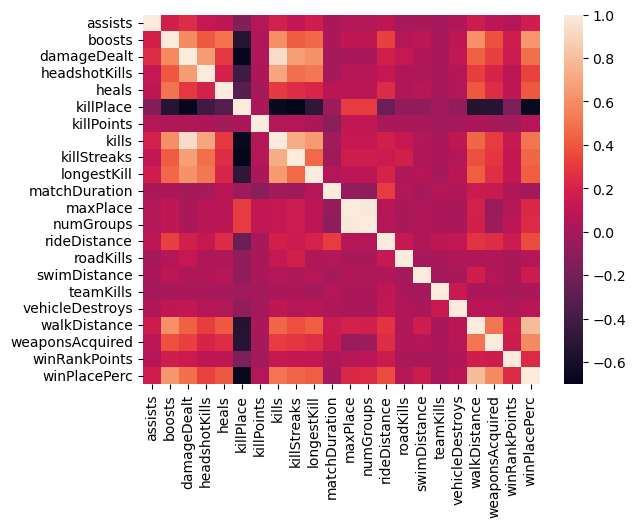

In [189]:
import seaborn as sns

sns.heatmap(soloDF_numeric03.corr())


<Axes: >

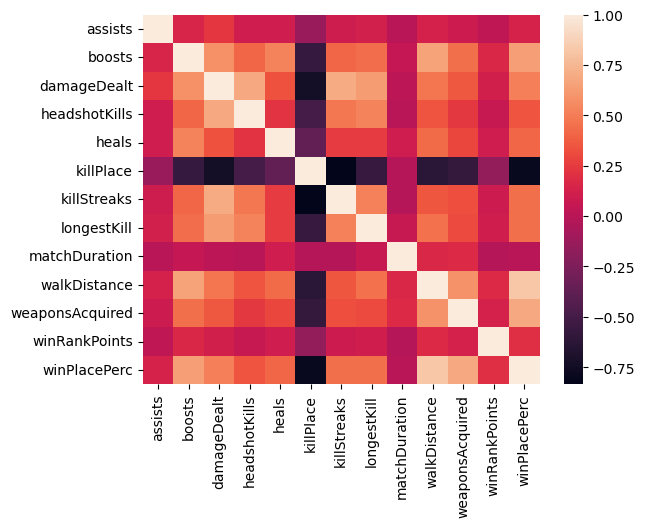

In [190]:
sns.heatmap(solofppDF_numeric03.corr())

In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


solo_X_train, solo_x_test, solo_y_train, solo_y_test = train_test_split(solo_featureDF,
                                                    solo_targetSR,
                                                    )
sf_X_train, sf_x_test, sf_y_train, sf_y_test = train_test_split(solofpp_featureDF,
                                                    solofpp_targetSR,
                                                    )
type(solo_y_test)


c:\Users\Administrator\anaconda3\envs\EXAM_ML\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


pandas.core.series.Series

In [192]:
# modelList = [LinearRegression, Ridge, BayesianRidge, DecisionTreeRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor, XGBRegressor]
# scalerList = [StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures]


# def ML(X_train, x_test, y_train, y_test, n, TF):
#     mmae = 10000
#     for idx, s in enumerate(scalerList):
#         scaler = s()
#         if idx ==3:
#             scaler = PolynomialFeatures(degree=n, include_bias=TF)
               
#         scaler.fit(X_train)
#         train = scaler.transform(X_train)
#         test = scaler.transform(x_test)
        
#         for idx2, m in enumerate(modelList):
#             # print(s[0])
#             model = m()
#             model.fit(train, y_train)
#             train_score = model.score(train, y_train)
#             test_score = model.score(test, y_test)
#             mae = mean_absolute_error(y_test, model.predict(test))
#             print(f'{idx+1}-{idx2+1} {s.__name__:20} {m.__name__:25} - [Train Score] : {train_score:.3f}, [Test Score] : {test_score:.3f}, [MAE] : {mae:.3f}', end=' ')
#             if train_score < test_score+0.03:
#                 print(f'{train_score < test_score+0.03}', end=' ')
#             else:
#                 print(' ')
#             if mae <= mmae:
#                 mmae = mae
#                 print(f'mmae : {mmae:.3f}')
#             else:
#                 print()
            
# ML(solo_X_train, solo_x_test, solo_y_train, solo_y_test, 2,True)


In [17]:
solo_X_train, solo_x_test

(         assists  boosts  damageDealt  headshotKills  heals  killPlace  \
 2883507        0       1        67.77              0      1         68   
 3810265        0       0         0.00              0      0         91   
 2162142        0       3       159.80              1      0          6   
 2334237        0       0       100.00              0      2         31   
 3095469        0       0         0.00              0      0         61   
 ...          ...     ...          ...            ...    ...        ...   
 3815751        0       1       100.00              0      0         38   
 4012573        0       0        47.30              0      0         92   
 2821164        0       0       100.00              0      0         42   
 1219813        0       0       200.00              0      0         19   
 2370679        1       2       848.60              1      2          1   
 
          killStreaks  longestKill  matchDuration  walkDistance  \
 2883507            0        0.

In [20]:
resultList = []
from sklearn.pipeline import Pipeline
param = {
    # 'learning_rate': [0.01, 0.1, 0.3],
    # 'n_estimators': [100, 300, 500],
    # # 'max_depth': [3, 5, 8],
    # 'min_child_weight': [1, 3, 5],
    # 'gamma': [0, 1, 3],

}

def LinearGrid(X_train, x_test, y_train, y_test, n, TF):
    mmae = 1000
    scaler = RobustScaler()
        
    # scaler.fit(X_train)
    # test = scaler.transform(x_test)

    model = GridSearchCV(XGBRegressor(), param_grid=param,return_train_score=True)
    model = Pipeline(
        steps=[('scaler', scaler), ('model', model)]
    )
    model.fit(X_train,y_train)
    
    mae = mean_absolute_error(y_test, model.predict(x_test))
    resultList.append(mae)
    print(f'MAE : {mae:.3f}')
    # best_model_params = model.best_estimator_.get_params()
    # print(best_model_params)
    return model

LinearGrid(solo_X_train, solo_x_test, solo_y_train, solo_y_test, 2, True)
print(resultList)
LinearGrid(sf_X_train, sf_x_test, sf_y_train, sf_y_test, 2, True)
print(resultList)


LG1 = LinearGrid(solo_X_train, solo_x_test, solo_y_train, solo_y_test, 2, True)
LG2 = LinearGrid(sf_X_train, sf_x_test, sf_y_train, sf_y_test, 2, True)



MAE : 0.052
[0.05171625565552764]
MAE : 0.050
[0.05171625565552764, 0.05049981794801274]
MAE : 0.052
MAE : 0.050


In [25]:
solo_X_train.iloc[10].tolist(
    
)

[0.0, 0.0, 323.2, 2.0, 0.0, 12.0, 1.0, 81.09, 1347.0, 108.8, 2.0, 1517.0]

In [22]:
import joblib
import os
model_dir='../model'
model_filename=model_dir+'/solotpp_model.pkl'
model_filename2=model_dir+'/solofpp_model.pkl'


# 저장 폴더 존재여부 확인 후 저장
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
#%%
# 모델 파일을 지정된 경로에 저장
joblib.dump(LG1, model_filename)
joblib.dump(LG2, model_filename2)

['../model/solofpp_model.pkl']

In [212]:
# modelList = [LinearRegression, Ridge, BayesianRidge, DecisionTreeRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor, XGBRegressor]
modelList = [XGBRegressor]
# scalerList = [StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures]
scalerList = [RobustScaler]

param = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 300, 500],
    # 'max_depth': [3, 5, 8],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 1, 3],

}


def ML(X_train, x_test, y_train, y_test, n, TF):
    mmae = 10000
    for idx, s in enumerate(scalerList):
        for i in [True, False]:
            for j in [True, False]:
                for k in [True, False]:
                    scaler = RobustScaler(with_centering=i, with_scaling=j, copy=k)
                    # if idx ==3:
                    #     scaler = PolynomialFeatures(degree=n, include_bias=TF)
                        
                    scaler.fit(X_train)
                    train = scaler.transform(X_train)
                    test = scaler.transform(x_test)
                    
                    for idx2, m in enumerate(modelList):
                        # print(s[0])
                        model = GridSearchCV(m(), param_grid=param,return_train_score=True)
                        model.fit(train, y_train)
                        train_score = model.score(train, y_train)
                        test_score = model.score(test, y_test)
                        mae = mean_absolute_error(y_test, model.predict(test))
                        print(f'{idx+1}-{idx2+1} {s.__name__} {m.__name__} - [Train Score] : {train_score:.3f}, [Test Score] : {test_score:.3f}, [MAE] : {mae:.3f}', end=' ')
                        if train_score < test_score+0.03:
                            print(f'{train_score < test_score+0.03}', end=' ')
                        else:
                            print(' ')
                        if mae <= mmae:
                            mmae = mae
                            print(f'with_centering={i}, with_scaling={j}, copy={k}, mmae : {mmae:.3f}')
                        else:
                            print()
                        print(model.get_params())
                        
    return model
            
modelReturn = ML(solo_X_train, solo_x_test, solo_y_train, solo_y_test, 2,True)
modelReturn2 = ML(sf_X_train, sf_x_test, sf_y_train, sf_y_test, 2,True)

1-1 RobustScaler XGBRegressor - [Train Score] : 0.970, [Test Score] : 0.946, [MAE] : 0.050 True with_centering=True, with_scaling=True, copy=True, mmae : 0.050
{'cv': None, 'error_score': nan, 'estimator__objective': 'reg:squarederror', 'estimator__base_score': None, 'estimator__booster': None, 'estimator__callbacks': None, 'estimator__colsample_bylevel': None, 'estimator__colsample_bynode': None, 'estimator__colsample_bytree': None, 'estimator__device': None, 'estimator__early_stopping_rounds': None, 'estimator__enable_categorical': False, 'estimator__eval_metric': None, 'estimator__feature_types': None, 'estimator__gamma': None, 'estimator__grow_policy': None, 'estimator__importance_type': None, 'estimator__interaction_constraints': None, 'estimator__learning_rate': None, 'estimator__max_bin': None, 'estimator__max_cat_threshold': None, 'estimator__max_cat_to_onehot': None, 'estimator__max_delta_step': None, 'estimator__max_depth': None, 'estimator__max_leaves': None, 'estimator__min

In [196]:
import joblib
import os
model_dir='../model'
model_filename=model_dir+'/solo_dt.pkl'
model_filename2=model_dir+'/solofpp_dt.pkl'


# 저장 폴더 존재여부 확인 후 저장
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
#%%
# 모델 파일을 지정된 경로에 저장
joblib.dump(modelReturn, model_filename)
joblib.dump(modelReturn2, model_filename2)

['../model/solofpp_dt.pkl']

In [197]:
# {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [217]:
soloDF_numeric03.columns



Index(['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winRankPoints', 'winPlacePerc'],
      dtype='object')

In [210]:
modelList = [XGBRegressor]
scalerList = [StandardScaler]


def ML(X_train, x_test, y_train, y_test, n, TF):
    mmae = 10000
    for idx, s in enumerate(scalerList):
        for i in [True, False]:
            for j in [True, False]:
                for k in [True, False]:
                    scaler = StandardScaler(copy=i, with_mean=j, with_std=k)
                    # if idx ==3:
                    #     scaler = PolynomialFeatures(degree=n, include_bias=TF)
                        
                    scaler.fit(X_train)
                    train = scaler.transform(X_train)
                    test = scaler.transform(x_test)
                    
                    for idx2, m in enumerate(modelList):
                        # print(s[0])
                        model = m()
                        model.fit(train, y_train)
                        train_score = model.score(train, y_train)
                        test_score = model.score(test, y_test)
                        mae = mean_absolute_error(y_test, model.predict(test))
                        print(f'{idx+1}-{idx2+1} {s.__name__} {m.__name__} - [Train Score] : {train_score:.3f}, [Test Score] : {test_score:.3f}, [MAE] : {mae:.3f}', end=' ')
                        if train_score < test_score+0.03:
                            print(f'{train_score < test_score+0.03}', end=' ')
                        else:
                            print(' ')
                        if mae <= mmae:
                            mmae = mae
                            print(f'copy={i}, with_mean={j}, with_std={k}, mmae : {mmae:.3f}')
                        else:
                            print()
    print(model.get_params())
                        
    return model
            
modelReturn = ML(solo_X_train, solo_x_test, solo_y_train, solo_y_test, 2,True)
modelReturn2 = ML(sf_X_train, sf_x_test, sf_y_train, sf_y_test, 2,True)

1-1 StandardScaler XGBRegressor - [Train Score] : 0.983, [Test Score] : 0.942, [MAE] : 0.052  
copy=True, with_mean=True, with_std=True, mmae : 0.052
1-1 StandardScaler XGBRegressor - [Train Score] : 0.983, [Test Score] : 0.942, [MAE] : 0.052  
copy=True, with_mean=True, with_std=False, mmae : 0.052
1-1 StandardScaler XGBRegressor - [Train Score] : 0.983, [Test Score] : 0.942, [MAE] : 0.052  
copy=True, with_mean=False, with_std=True, mmae : 0.052
1-1 StandardScaler XGBRegressor - [Train Score] : 0.983, [Test Score] : 0.942, [MAE] : 0.052  
copy=True, with_mean=False, with_std=False, mmae : 0.052
1-1 StandardScaler XGBRegressor - [Train Score] : 0.983, [Test Score] : 0.942, [MAE] : 0.052  
copy=False, with_mean=True, with_std=True, mmae : 0.052
1-1 StandardScaler XGBRegressor - [Train Score] : 0.983, [Test Score] : 0.942, [MAE] : 0.052  
copy=False, with_mean=True, with_std=False, mmae : 0.052
1-1 StandardScaler XGBRegressor - [Train Score] : 0.983, [Test Score] : 0.942, [MAE] : 0.052 